In [3]:
import numpy as np
import torch
from matplotlib import pyplot as plt
plt.style.use('../styles_and_utils/graphstyle.mplstyle')

import sys
sys.path.insert(1, '../')
from styles_and_utils import *


In [ ]:
attn_dist = torch.load('attn_dist.pt',map_location=torch.device('cpu'))

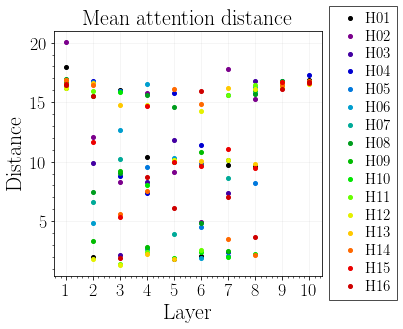

In [34]:
w, h = plt.rcParams["figure.figsize"]
fig, ax = plt.subplots(1, 1, figsize=(w/1.5,h))
NUM_COLORS = len(attn_dist[0])
cm = plt.get_cmap('nipy_spectral')
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in range(0, len(attn_dist)):
    ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    for j in range(len(attn_dist[i])):
        if i == 0:
            ax.plot((i+1), attn_dist[i,j].cpu().numpy(),'o', markersize=4, label = 'H{:02d}'.format(j+1))
        else:
            ax.plot((i+1), attn_dist[i,j].cpu().numpy(),'o', markersize=4)
#     plt.plot(i+1, attn_dist[i].mean().detach().cpu().numpy(),'ko')   
ax.xaxis.set_ticks(np.arange(1,11))
ax.set_xlabel('Layer')
ax.set_ylabel('Distance')
ax.set_title('Mean attention distance')    
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', labelspacing=0.3, handletextpad=0)
fig.savefig('./plots/attn_dist.pdf', format="pdf", bbox_inches = 'tight')
plt.show()